In [244]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [245]:
df = pd.read_csv("marketing_campaign.csv", index_col= "Unnamed: 0")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# preprocessing and feature engineering

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [247]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [248]:
# filling the missing values 
df["Income"].fillna(df["Income"].mean() , inplace=True) 

In [249]:
# converting the date into datetime 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6940\1254369815.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [250]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [251]:
# get the age from year_birth column
df["Age"] = 2023 - df["Year_Birth"]

In [252]:
# total amount spent by each customer
df["Total_Spent"] = df["MntWines"]+df["MntFishProducts"]+df["MntFruits"]+df["MntGoldProds"]+df["MntSweetProducts"]+df["MntMeatProducts"]

In [253]:
# no. of children in each family
df["Children"]= df["Kidhome"]+df["Teenhome"]

In [254]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [255]:
# total family size of each customer
for i in range(len(df)):
    if df.iloc[i, 3] in ['Together', 'Married']:
        df.loc[i, "Family_size"] = 2 + df.loc[i, "Children"]
    else:
        df.loc[i, "Family_size"] = 1 + df.loc[i, "Children"]

In [256]:
# if the customer is single of with someone
for i in range(len(df)):
    if df.iloc[i, 3] in ['Together', 'Married']:
        df.loc[i, "Living_With"] = "Partner" 
    else:
        df.loc[i, "Living_With"] = "Alone" 

In [257]:
# if customer has kids or not 
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [258]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                         "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [259]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [260]:
# drop the redundant variables 
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"],axis = 1)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [262]:
#Label Encoding the object dtypes.
LE=LabelEncoder()

In [263]:
df["Education"] = LE.fit_transform(df["Education"])
df["Living_With"] = LE.fit_transform(df["Living_With"])

In [264]:
# removing some inconsistent data
df = df[(df["Age"]<90)]
df = df[(df["Income"]<300000)]

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [266]:
df.Total_Spent.describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Spent, dtype: float64

In [267]:
df.Income.describe()

count      2236.000000
mean      51961.906544
std       21411.404811
min        1730.000000
25%       35502.500000
50%       51684.000000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

### scaling



In [268]:
df1 = df.copy()

In [269]:
df1["Total_Promos"] = df1["AcceptedCmp1"]+ df1["AcceptedCmp2"]+ df1["AcceptedCmp3"]+ df1["AcceptedCmp4"]+ df1["AcceptedCmp5"]


In [270]:
df1 = df1.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2', 'Complain', 'Response'], axis = 1)

In [271]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [272]:
df1_scaled = pd.DataFrame(scaler.transform(df1), columns = df1.columns) 

In [273]:
df1_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Spent,Children,Family_size,Living_With,Is_Parent,Total_Promos
0,-0.89438,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,2.509801,-0.552429,0.692865,1.016868,1.680176,-1.264308,-1.758810,-1.347635,-1.584362,-0.438933
1,-0.89438,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.568970,-1.167738,-0.131421,1.273264,-0.962202,1.395139,0.445618,-1.347635,0.631169,-0.438933
2,-0.89438,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.226884,1.293496,-0.543564,0.333146,0.282541,-1.264308,-0.656596,0.742041,-1.584362,-0.438933
3,-0.89438,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.911056,-0.552429,0.280722,-1.290693,-0.918994,0.065416,0.445618,0.742041,0.631169,-0.438933
4,0.57070,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.115201,0.062879,-0.131421,-1.034298,-0.305762,0.065416,0.445618,0.742041,0.631169,-0.438933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,...,0.115201,-0.552429,-0.131421,0.162216,1.221499,0.065416,0.445618,0.742041,0.631169,-0.438933
2232,0.57070,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,...,-0.226884,-0.244775,0.692865,1.956986,-0.269201,2.724862,2.650045,0.742041,0.631169,1.034721
2233,-0.89438,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,...,0.115201,2.216459,0.280722,-1.034298,1.055312,-1.264308,-1.758810,-1.347635,-1.584362,1.034721
2234,0.57070,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,...,0.799373,1.293496,-0.955707,1.102333,0.393886,0.065416,0.445618,0.742041,0.631169,-0.438933


# Dimensionality reduction

In [274]:
pca = PCA(n_components=3)
pca.fit(df1_scaled)
PCA_data = pd.DataFrame(pca.transform(df1_scaled), columns=(["col1","col2", "col3"]))

In [275]:
PCA_df1 = PCA_data.copy()
PCA_df1 

,col1,col2,col3
0,4.814537,-0.432748,1.134809
1,-2.860476,0.215347,0.761373
2,2.535486,-0.720833,-0.144870
3,-2.644967,-1.341329,-1.140719
4,-0.676840,0.273564,-1.270877
...,...,...,...
2231,2.219083,2.397828,-0.185205
2232,-2.857286,4.289050,-0.656894
2233,2.841979,-1.767750,1.407010
2234,1.439334,1.817446,-0.220756


In [276]:
df2 = PCA_data.copy()

In [277]:
df3 = PCA_data.copy()

# Apply different clustering techniques

### K-means

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

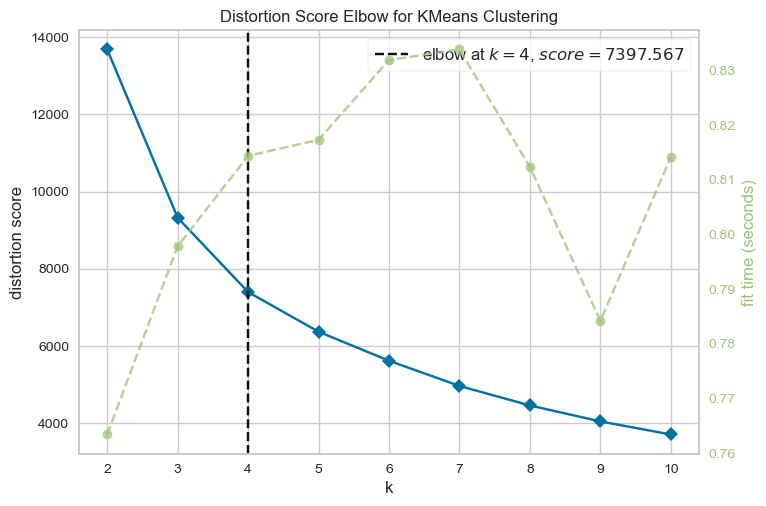

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [278]:
# deciding number of clusters using elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

In [279]:
# K-means model buliding
kmeans = KMeans(n_clusters=4, random_state=1)

In [280]:
# assinging the clusters to each observation
cluster_assignments = kmeans.fit_predict(PCA_df1)
PCA_df1["Clusters"] = cluster_assignments
df1["Clusters"] = cluster_assignments

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [281]:
PCA_df1

,col1,col2,col3,Clusters
0,4.814537,-0.432748,1.134809,1
1,-2.860476,0.215347,0.761373,0
2,2.535486,-0.720833,-0.144870,1
3,-2.644967,-1.341329,-1.140719,2
4,-0.676840,0.273564,-1.270877,0
...,...,...,...,...
2231,2.219083,2.397828,-0.185205,3
2232,-2.857286,4.289050,-0.656894,0
2233,2.841979,-1.767750,1.407010,1
2234,1.439334,1.817446,-0.220756,3


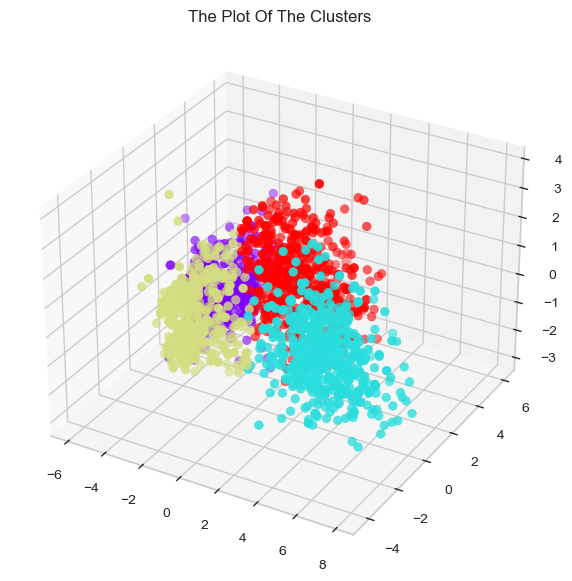

In [282]:
# plotting the clusters
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df1["col1"],PCA_df1["col2"], PCA_df1["col3"], s=40, c=PCA_df1["Clusters"], marker='o',cmap='rainbow')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [283]:
# Silhouette score for evaluation
silhouette_avg = silhouette_score(PCA_df1, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46568105064777954


In [284]:
# we can also get the number of clusters using the silhouette score 
sil_score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_df1)
    score = silhouette_score(PCA_df1,kmeans.labels_)
    sil_score.append(score)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

In [285]:
sil_score

[0.4246308729521342,
 0.45067730523915617,
 0.46568105064777954,
 0.44196816476219064,
 0.40421436619833656,
 0.36382660322988564,
 0.3635352114918893,
 0.36806914800036006,
 0.38221964474533004]

# Profiling the Clusters

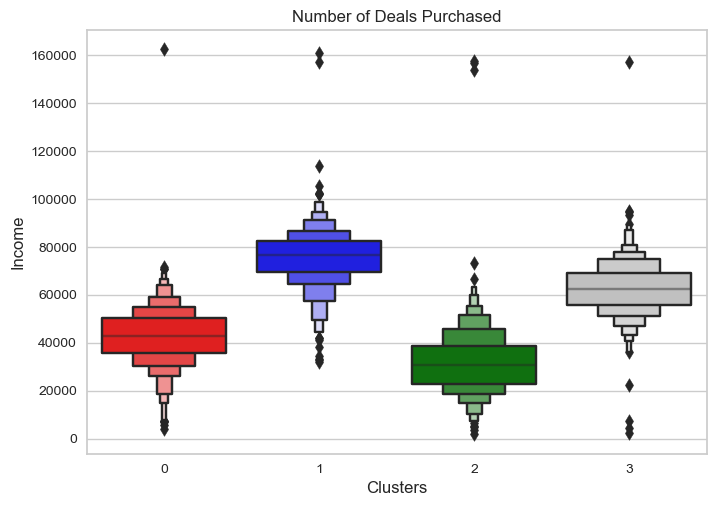

In [286]:
cluster_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'silver'}  

#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df1["Income"],x=df1["Clusters"], palette= cluster_palette)
pl.set_title("Number of Deals Purchased")
plt.show()

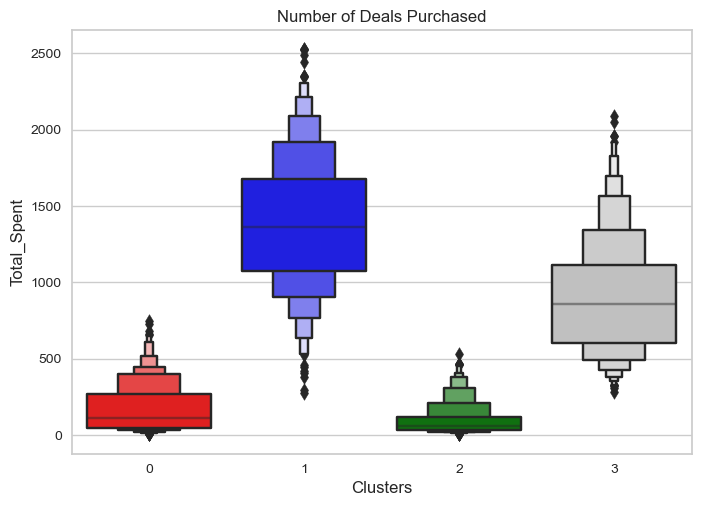

In [287]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df1["Total_Spent"],x=df1["Clusters"], palette= cluster_palette)
pl.set_title("Number of Deals Purchased")
plt.show()

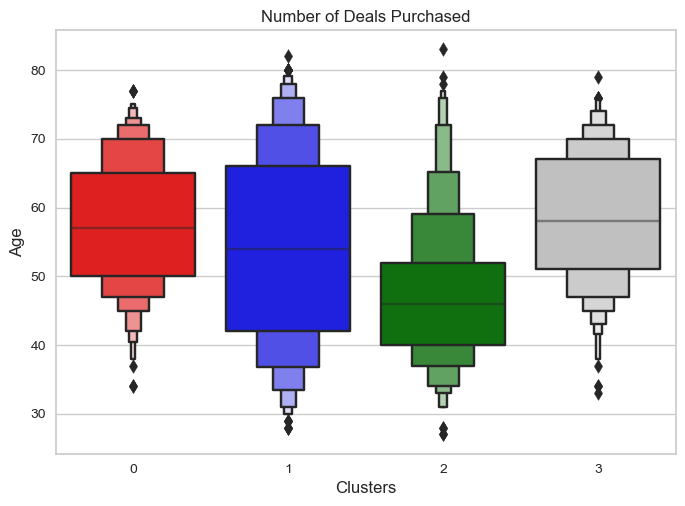

In [288]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df1["Age"],x=df1["Clusters"], palette= cluster_palette)
pl.set_title("Number of Deals Purchased")
plt.show()

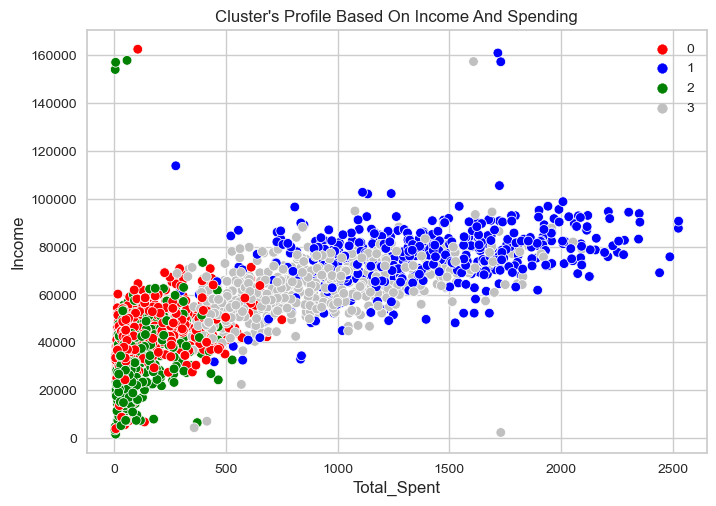

In [289]:
pl = sns.scatterplot(data = df1, x = df1["Total_Spent"], y = df1["Income"], hue = df1["Clusters"], color = df1["Clusters"],palette=cluster_palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

* cluster 0 : little more than average income and high spending
* cluster 1 : low income and low spending
* cluster 2 : high income and high spending
* cluster 3 : average income and average spending

In [290]:
df1.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Total_Spent', 'Children', 'Family_size',
       'Living_With', 'Is_Parent', 'Total_Promos', 'Clusters'],
      dtype='object')

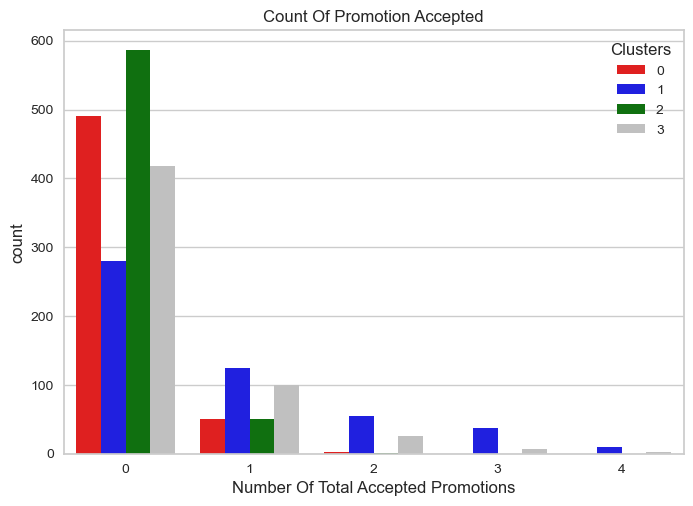

In [291]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df1["Total_Promos"],hue=df1["Clusters"], palette= cluster_palette)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

* There has not been much response from the customers for the promos, better strategies are needed for promos in the future.
* Most customers have not accepted even one promotion offer. 
* Cluster 2 have the highest promotion acception rate, since they have high earnings.

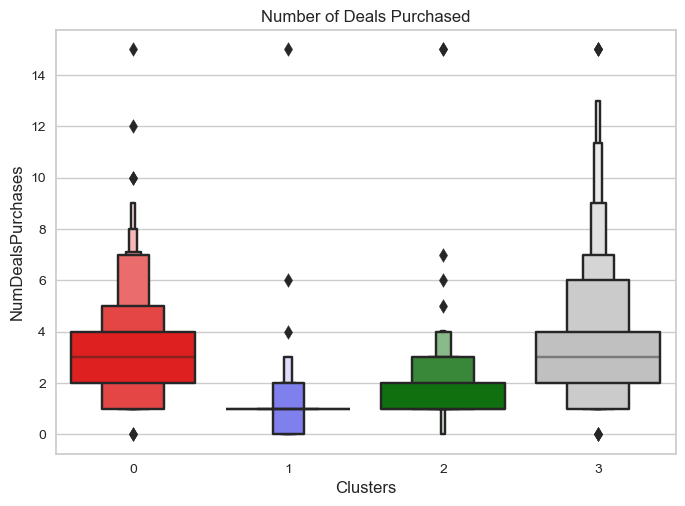

In [292]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df1["NumDealsPurchases"],x=df1["Clusters"], palette= cluster_palette)
pl.set_title("Number of Deals Purchased")
plt.show()

* Deals offered have quite good response, unlike promotions campaign.
* cluster 1 and 3 have the best response. But cluster 2, which is the best customer segment is not much interested in deals offered.

In [293]:
def categorize_age(age):
    if age <= 39 and age >= 20:
        return "adult"
    elif age >= 40 and age <= 59:
        return "middle aged"
    else:
        return "senior citizen"

In [294]:
df1['Age_Category'] = df1['Age'].apply(categorize_age)

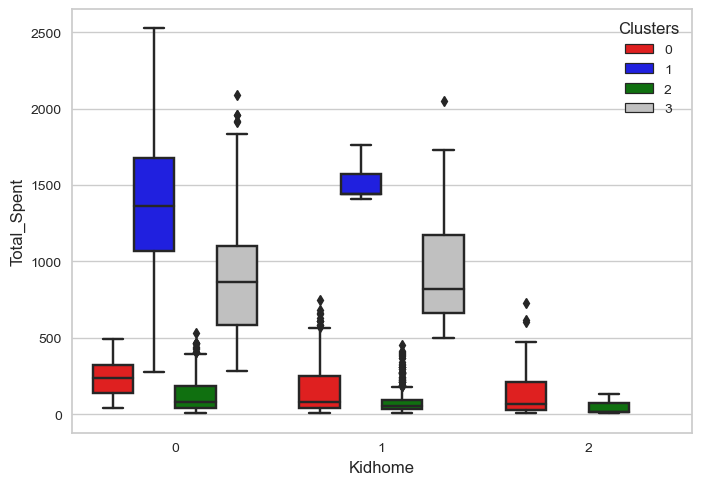

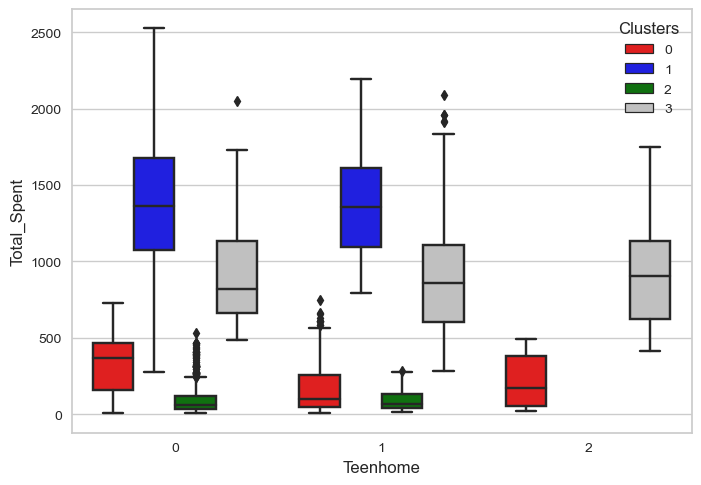

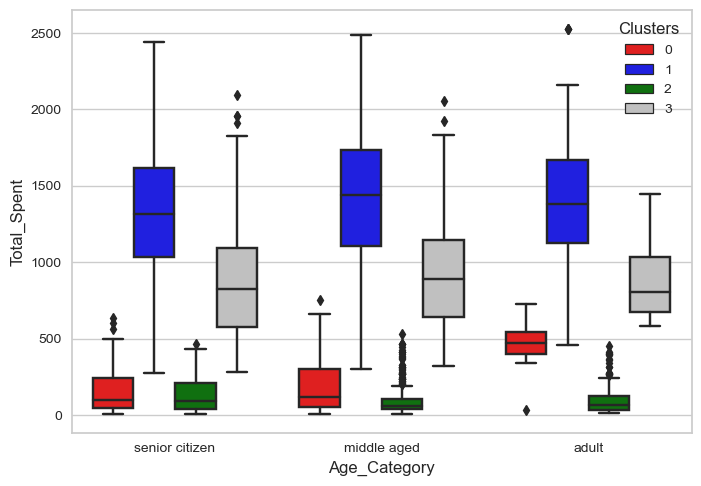

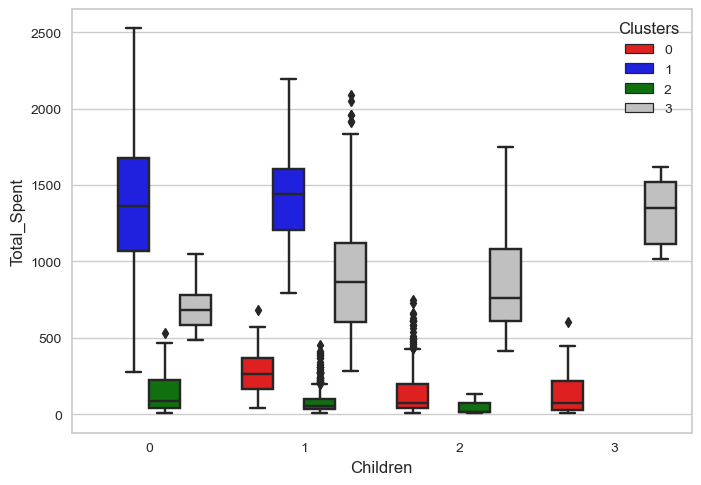

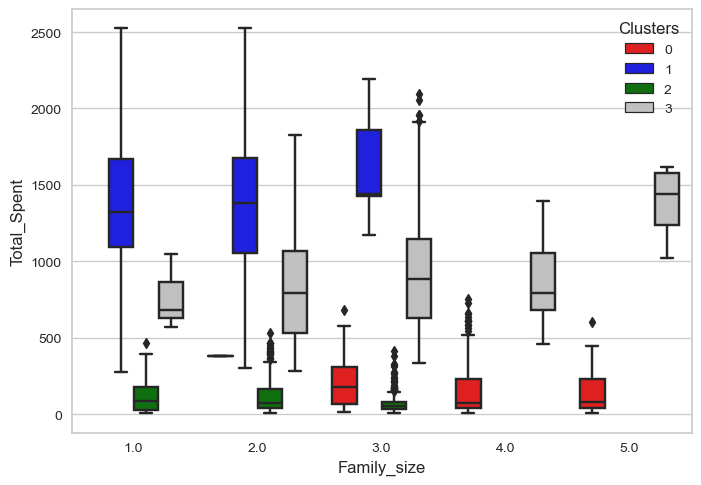

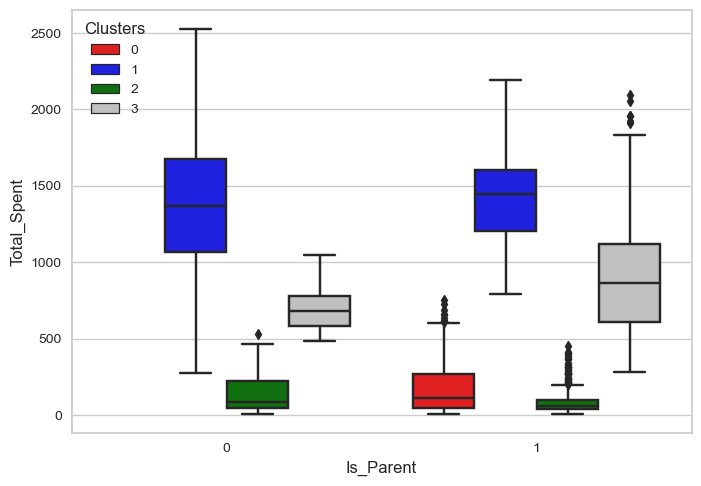

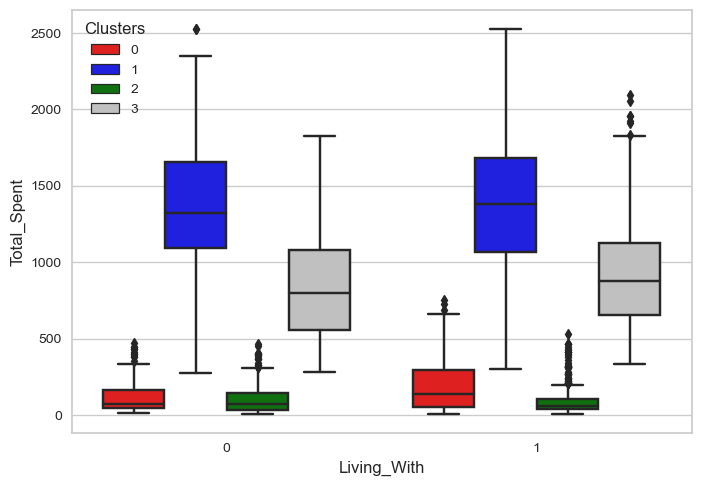

In [295]:
Personal = [ "Kidhome","Teenhome", "Age_Category", "Children", "Family_size", "Is_Parent","Living_With"]

for i in Personal:
    plt.figure()
    sns.boxplot(x=df1[i], y=df1["Total_Spent"], hue =df1["Clusters"],  palette=cluster_palette)
    plt.show()

In [296]:
df_profile = df1.describe().T
df_profile["overall_mean"] = df_profile[["mean"]]
df_profile

,count,mean,std,min,25%,50%,75%,max,overall_mean
Education,2236.0,0.610465,0.682709,0.0,0.0,0.0,1.00,2.0,0.610465
Income,2236.0,51961.906544,21411.404811,1730.0,35502.5,51684.0,68275.75,162397.0,51961.906544
Kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0,0.444097
Teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0,0.506708
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0,49.116279
Wines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0,304.127460
Fruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0,26.275939
Meat,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0,166.983453
Fish,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0,37.536225
Sweets,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0,27.080501


In [297]:
df_profile = df_profile[["overall_mean"]]
df_profile

,overall_mean
Education,0.610465
Income,51961.906544
Kidhome,0.444097
Teenhome,0.506708
Recency,49.116279
Wines,304.127460
Fruits,26.275939
Meat,166.983453
Fish,37.536225
Sweets,27.080501


In [298]:
Cluster_summary = df1.groupby("Clusters").describe().T.reset_index()
Cluster_summary

Clusters,level_0,level_1,0,1,2,3
0,Education,count,542.000000,504.000000,637.000000,553.000000
1,Education,mean,0.595941,0.565476,0.708006,0.553345
2,Education,std,0.629689,0.655060,0.778736,0.626522
3,Education,min,0.000000,0.000000,0.000000,0.000000
4,Education,25%,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
179,Total_Promos,min,0.000000,0.000000,0.000000,0.000000
180,Total_Promos,25%,0.000000,0.000000,0.000000,0.000000
181,Total_Promos,50%,0.000000,0.000000,0.000000,0.000000
182,Total_Promos,75%,0.000000,1.000000,0.000000,0.000000


In [299]:
Cluster_summary = Cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

In [300]:
Cluster_summary = Cluster_summary[Cluster_summary['metric'] == "mean"]
Cluster_summary = Cluster_summary.set_index('column')

In [301]:
Cluster_summary

Clusters,metric,0,1,2,3
column,,,,,
Education,mean,0.595941,0.565476,0.708006,0.553345
Income,mean,42744.009709,75759.682550,31815.069871,62514.448927
Kidhome,mean,0.865314,0.009921,0.681319,0.153707
Teenhome,mean,0.968635,0.019841,0.102041,0.963834
Recency,mean,49.621771,49.361111,48.566719,49.030741
Wines,mean,100.311808,613.341270,34.075353,533.146474
Fruits,mean,5.249077,65.577381,6.340659,34.028933
Meat,mean,36.666052,470.976190,24.401884,181.891501
Fish,mean,7.474170,96.351190,9.791209,45.356239


In [302]:
df_cluster_profile = Cluster_summary.join(df_profile)

In [303]:
df_cluster_profile

,metric,0,1,2,3,overall_mean
column,,,,,,
Education,mean,0.595941,0.565476,0.708006,0.553345,0.610465
Income,mean,42744.009709,75759.682550,31815.069871,62514.448927,51961.906544
Kidhome,mean,0.865314,0.009921,0.681319,0.153707,0.444097
Teenhome,mean,0.968635,0.019841,0.102041,0.963834,0.506708
Recency,mean,49.621771,49.361111,48.566719,49.030741,49.116279
Wines,mean,100.311808,613.341270,34.075353,533.146474,304.127460
Fruits,mean,5.249077,65.577381,6.340659,34.028933,26.275939
Meat,mean,36.666052,470.976190,24.401884,181.891501,166.983453
Fish,mean,7.474170,96.351190,9.791209,45.356239,37.536225


# Cluster characteristics


1) #### Cluster 0 :

    * Older than average
    * Definitely a parent
    * Mostly a couple
    * Almost all did not accept promos
    * Income low and spending also low
    * High number of visits but low purchasing power
    
2) #### Cluster 1 :
    
    * Average age
    * Almost none are parent
    * About half are couples 
    * A large part accepted promos
    * Income high and spending also high 
    * Less number of visits but more purchasing power
    * There is a large potential that can be explored in this group of customers

3) #### Cluster 2 :

    * Relatively younger in age 
    * mostly a parent
    * About half are couples
    * Almost all did not accept promos
    * Income very low and spending also very low
    * Visits high but very low purchasing power
    
4) #### Cluster 3 :
    
    * Relatively older in age 
    * Almost definitely a parent
    * More than half are couples 
    * One third people accepted promos
    * Income is high and spending is also high
    * More visits and high spending
    * This group of customers are biggest revenue generator